Una red neuronal es un modelo matemático inspirado en el cerebro humano. Está compuesta por nodos llamados neuronas, que están organizados en capas. Estas redes se entrenan para aprender patrones en los datos a través de un proceso llamado propagación hacia adelante y retropropagación.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

df["preciptype"].unique()
df["icon"].unique()
df

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df


# Definir X (variables independientes)
X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon", "icono numero"], axis=1)

# Convertir y a una sola columna con valores categóricos
y = to_categorical(df["icono numero"])


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [2]:


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])


# 5. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# 6. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop, reduce_lr])

# 7. Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {test_acc:.4f}")

c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3763 - loss: 26.7055 - val_accuracy: 0.5804 - val_loss: 2.0337 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5656 - loss: 2.5845 - val_accuracy: 0.7343 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6731 - loss: 0.8621 - val_accuracy: 0.8671 - val_loss: 0.5656 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8403 - loss: 0.5342 - val_accuracy: 0.7413 - val_loss: 0.6842 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8577 - loss: 0.4877 - val_accuracy: 0.9720 - val_loss: 0.4006 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8852 - loss: 0.3756 - val_accuracy: 0.7413 - val_loss: 0.6803 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8302 - loss: 0.4784 - val_accuracy

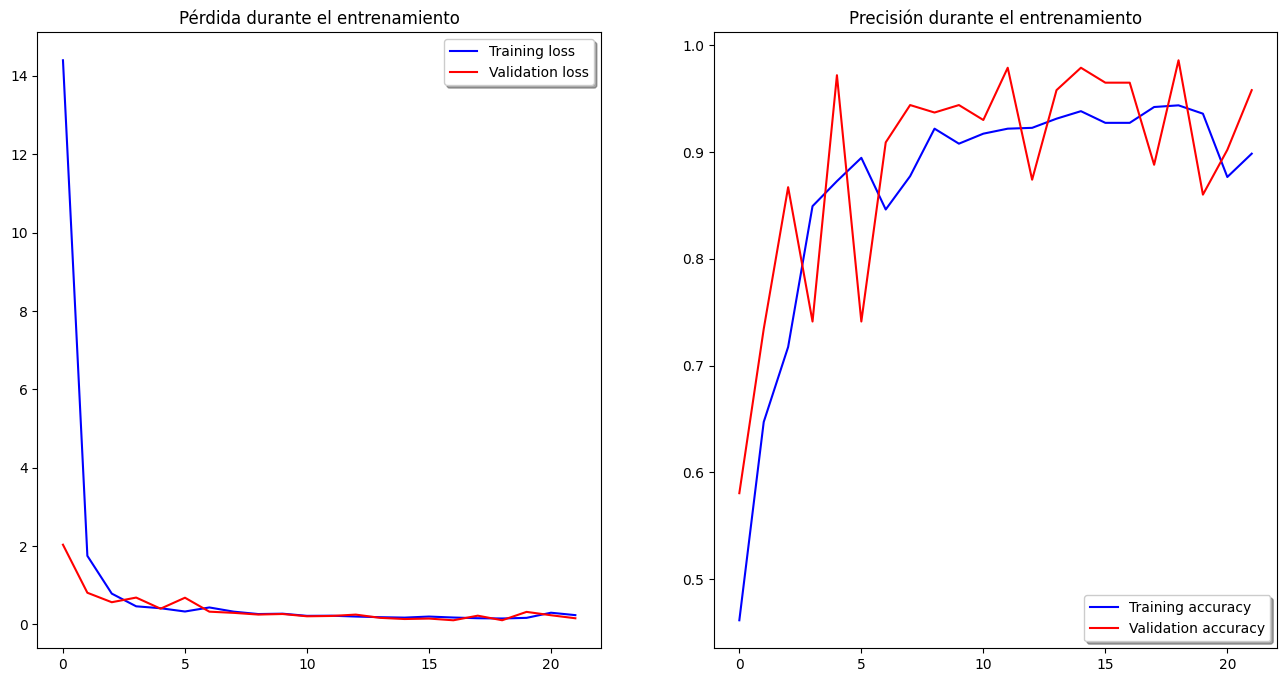

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Ejemplo 1: Predicho → partly-cloudy-day | Real → partly-cloudy-day
Ejemplo 2: Predicho → partly-cloudy-day | Real → partly-cloudy-day
Ejemplo 3: Predicho → clear-day | Real → clear-day
Ejemplo 4: Predicho → clear-day | Real → clear-day
Ejemplo 5: Predicho → rain | Real → rain


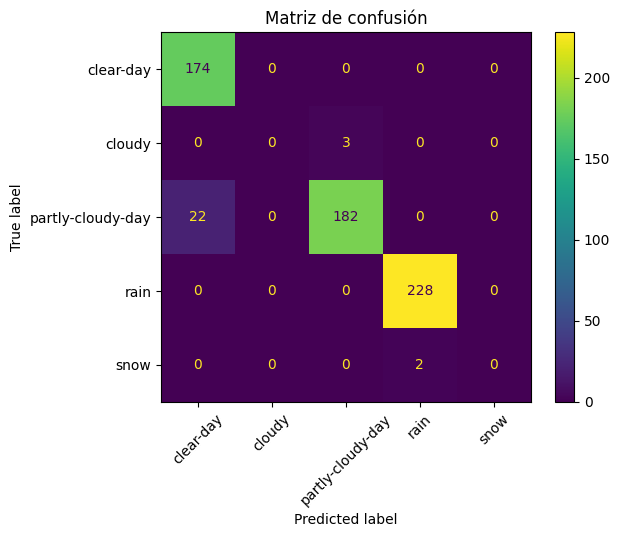

In [4]:
import numpy as np

# Predicciones (en forma de probabilidades)
y_pred_probs = model.predict(X_test)

# Convertir a clases predichas (índice de la clase con mayor probabilidad)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convertir y_test a clases verdaderas
y_true_classes = np.argmax(y_test, axis=1)

# Mostrar primeros 5 resultados
for i in range(5):
    pred = labelencoder.inverse_transform([y_pred_classes[i]])[0]
    real = labelencoder.inverse_transform([y_true_classes[i]])[0]
    print(f"Ejemplo {i+1}: Predicho → {pred} | Real → {real}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de confusión")
plt.show()


In [5]:
from sklearn.metrics import classification_report
import numpy as np

# Predicciones del modelo
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Clases predichas
y_true = np.argmax(y_test, axis=1)  

print(classification_report(y_true, y_pred, target_names=labelencoder.classes_))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                   precision    recall  f1-score   support

        clear-day       0.89      1.00      0.94       174
           cloudy       0.00      0.00      0.00         3
partly-cloudy-day       0.98      0.89      0.94       204
             rain       0.99      1.00      1.00       228
             snow       0.00      0.00      0.00         2

         accuracy                           0.96       611
        macro avg       0.57      0.58      0.57       611
     weighted avg       0.95      0.96      0.95       611



c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

df["preciptype"].unique()
df["icon"].unique()
df

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df


# Definir X (variables independientes)
X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon", "icono numero"], axis=1)

# Convertir y a una sola columna con valores categóricos
y = to_categorical(df["icono numero"])

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:


model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(5, activation='softmax')
])


# 5. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# 6. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop, reduce_lr])

# 7. Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/50


c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1946 - loss: 1.9307 - val_accuracy: 0.4895 - val_loss: 1.2647 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4818 - loss: 1.2320 - val_accuracy: 0.7133 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6794 - loss: 0.8897 - val_accuracy: 0.8182 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7614 - loss: 0.7061 - val_accuracy: 0.8811 - val_loss: 0.6174 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5873 - val_accuracy: 0.9161 - val_loss: 0.5226 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8557 - loss: 0.5119 - val_accuracy: 0.9231 - val_loss: 0.4511 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8791 - loss: 0.4399 - val_accuracy: 0.9510 - v

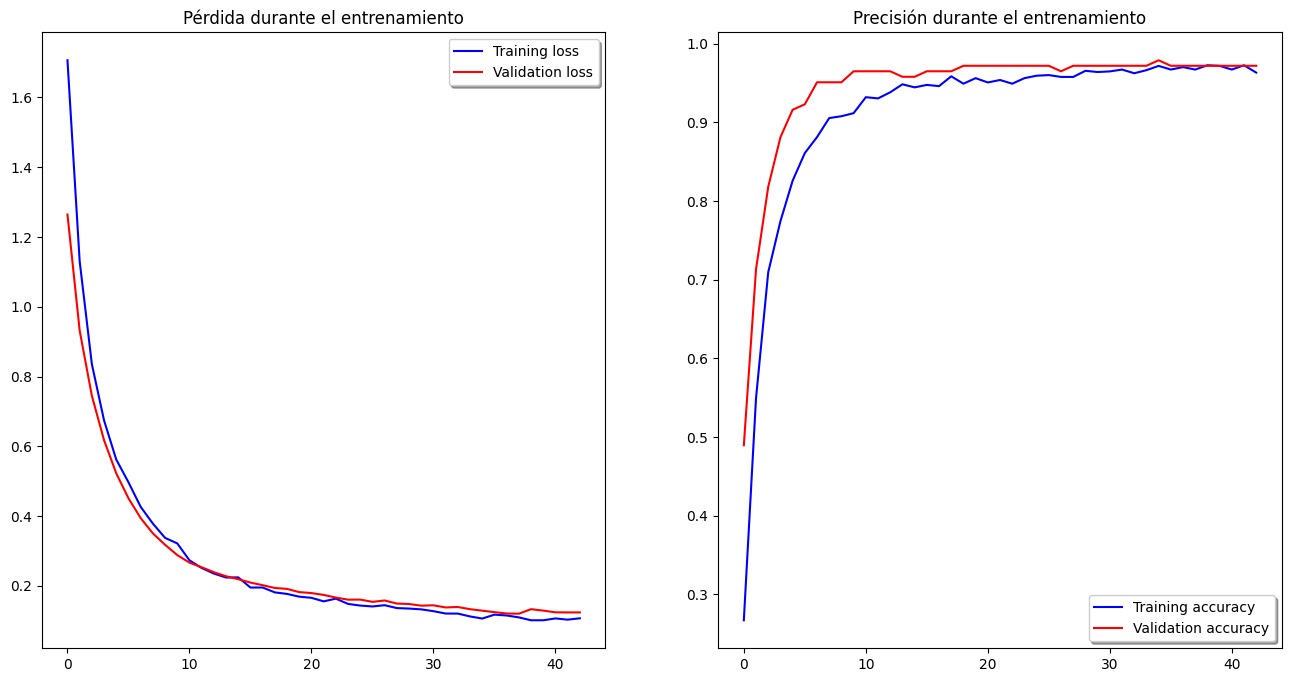

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()